<h1>
<center>CFRM 421/521, Spring 2023</center>
</h1>

<h1>
<center>Ryan Milgrim</center>
</h1>

<h1>
<center>Homework 4</center>
</h1>

* **Due: Wednesday, May 27, 2024, 11:59 PM**


* Total marks: 43


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. A regression MLP [12 marks]

Consider the original source of the California housing data (used in Homework 2) in Scikit-Learn.  The data is obtained and split using the code below, where we split off 20% as the test set, and then split off 20% of the training set as a validation set, and keep the remaining 80% of the training set as the actual training set. The following code creates the training set `X_train`, `y_train`, the validation set `X_valid`, `y_valid` and the test set `X_test`, `y_test`.

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_tmp, y_train_tmp, test_size=0.2, random_state=42)

## (a) [4 marks]

Use `tensorflow.keras` to train a regression MLP with a normalization layer as the first layer (`tf.keras.layers.Normalization(input_shape=X_train.shape[1:])`), and one hidden layer of 50 ReLU neurons. For the output layer, try both a ReLU activation function and no activation function (which is equivalent to the identity function). Explain which choice is better. Use the appropriate weight initialization. Use the Nadam optimizer. Train for 30 epochs, and report the mean squared error on the validation set. In the `.compile()` method, use `loss="mse"`.

**Solution**
<p>
Model B performs better. I believe that model A suffers from an exploding gradient problem which is why every prediction on the validation set scores as a 0. 
<p\>


In [2]:
from tensorflow import keras

# Define input shape
input_shape = X_train.shape[1:]

# Model A uses the He initialization and the ReLU activation function
model_A = keras.models.Sequential([
    keras.layers.Normalization(input_shape=input_shape),
    keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1, activation="relu", kernel_initializer="he_normal")
])

# Model B's uses the default kernel initializer (Glorot) and no activation function
model_B = keras.models.Sequential([
    keras.layers.Normalization(input_shape=input_shape),
    keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1)
])

# Compile models A and B with the same loss and optimizer
model_A.compile(loss="mse", optimizer="nadam")
model_B.compile(loss="mse", optimizer="nadam")

# Train for 30 epochs
history_A = model_A.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history_B = model_B.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/30


c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.5759 - val_loss: 6.3836
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7088 - val_loss: 6.3836
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5626 - val_loss: 6.3836
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6566 - val_loss: 6.3836
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.6240 - val_loss: 6.3836
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6065 - val_loss: 6.3836
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6135 - val_loss: 6.3836
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5476 - val_loss: 6.3836
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5878 - val_loss: 6.3836
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6056 - val_loss: 6.3836
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7159 - val_loss: 6.3836
Epoch 12/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.

In [5]:
# Report the MSE on the validation set
print("Model A MSE: ", model_A.evaluate(X_valid, y_valid))
print("Model B MSE: ", model_B.evaluate(X_valid, y_valid))

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 6.0919
Model A MSE:  6.383603096008301
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.4575
Model B MSE:  1.5186644792556763


## (b) [6 marks]

Read the section "Fine-Tuning Neural Network Hyperparameters" in the textbook and the corresponding section in the [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb) on the textbook website using Keras Tuner. You will need to install the package `keras_tuner` if you don't already have it.

Then use Keras Tuner to do a randomized search to search for the best hyperparameters. Do the randomized search over the first 5000 observations of the training set. Use 20 iterations, 20 epochs per iteration. Use the same network architecture as (a) except where otherwise specified below. Use no activation function for the output layer. Use a seed of 42, and the objective is clearly to minimize validation loss. The hyperparameters to search over are:

* Hidden layers: 1 to 5.
* Number of neurons per layer: 1 to 100.
* Learning rate: 1e-4 to 1e-2 using log sampling.
* $\ell_2$ regularizers with `l2` value: 1e-4 to 100 using log sampling.
* Optimizer: `tf.keras.optimizers.SGD(learning_rate=learning_rate,clipnorm=1.0)` and `tf.keras.optimizers.Nadam(learning_rate=learning_rate)`.

Print the best hyperparameter. (You can ignore any warning message you may get).

In [28]:
import keras_tuner as kt


def model_builder(hp):

    # Define the model
    model = keras.models.Sequential()    

    # Input layer
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Normalization())

    # Hyperparameters
    hp_hidden_layers = hp.Int("hidden_layers", min_value=1, max_value=5)
    hp_neurons = hp.Int("neurons", min_value=1, max_value=100)
    hp_learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    hp_l2 = hp.Float("l2", min_value=1e-4, max_value=100, sampling="log")


    # Add hidden layers
    for i in range(hp_hidden_layers):
        model.add(
            keras.layers.Dense(
                hp_neurons,
                activation="relu",
                kernel_initializer="he_normal",
                kernel_regularizer=keras.regularizers.l2(hp_l2)
            ))

    # Output layer
    model.add(keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(hp_l2)))

    # Set the optimizer
    hp_optimizer = hp.Choice("optimizer", ["SGD", "Nadam"])
    if hp_optimizer == "SGD":
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp_learning_rate, clipnorm=1.0)
    else:
        optimizer = tf.keras.optimizers.Nadam(learning_rate=hp_learning_rate)

    # Compile the model
    model.compile(loss="mse", optimizer=optimizer)
    return model

# Create the tuner 
tuner = kt.RandomSearch(
    model_builder, 
    objective="val_loss",
    directory="my_dir",
    project_name="HW4_Part1",
    seed=42,
    overwrite=True
)

# Search for the best hyperparameters
tuner.search(X_train[:5000], y_train[:5000], epochs=20, validation_data=(X_valid, y_valid))

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Trial 5 Complete [00h 00m 13s]
val_loss: 32.508331298828125

Best val_loss So Far: 1.081332802772522
Total elapsed time: 00h 01m 07s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
1                 |5                 |hidden_layers
75                |62                |neurons
0.002336          |0.0067187         |learning_rate
28.749            |0.00034837        |l2
SGD               |Nadam             |optimizer

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 813180.0000 - val_loss: 4906.6768
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4742.1826 - val_loss: 4633.2329
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4566.0479 - val_loss: 4507.1138
Epoch 4/20
 46/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4544.9346 

KeyboardInterrupt: 

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3472 - val_loss: 1.3155
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3559 - val_loss: 1.3146
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3434 - val_loss: 1.3126
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3459 - val_loss: 1.3132
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3373 - val_loss: 1.3194
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3233 - val_loss: 1.3119
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3389 - val_loss: 1.3148
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3333 - val_loss: 1.3143
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3337 - val_loss: 1.3146
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3474 - val_loss: 1.3191
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3399 - val_loss: 1.3113
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

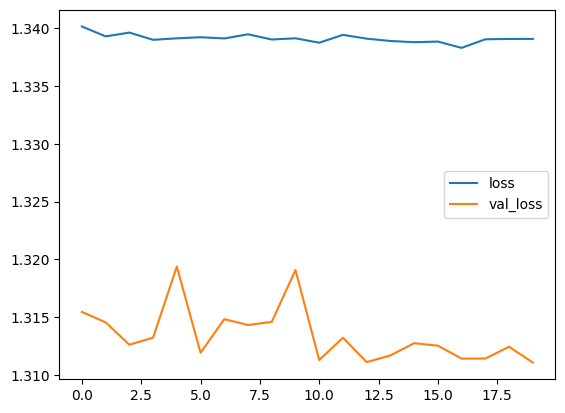

In [21]:
# Train the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.fit(X_train_tmp, y_train_tmp, epochs=20, validation_data=(X_test, y_test))

# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters:\n{best_hps.values}")

# Plot the learning curves
plt.plot(best_model.history.history["loss"], label="loss")
plt.plot(best_model.history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## (c) [2 marks]

For the best model in (b), train the model on the full training data for 200 epochs. Plot the learning curve. Does it look like the model is overfitting?

Epoch 1/20


c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 19 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3639 - val_loss: 1.3106
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3038 - val_loss: 1.3145
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3090 - val_loss: 1.3122
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3369 - val_loss: 1.3142
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3387 - val_loss: 1.3145
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3216 - val_loss: 1.3145
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3276 - val_loss: 1.3129
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3454 - val_loss: 1.3119
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3321 - val_loss: 1.3151
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3260 - val_loss: 1.3127
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3487 - val_loss: 1.3126
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.

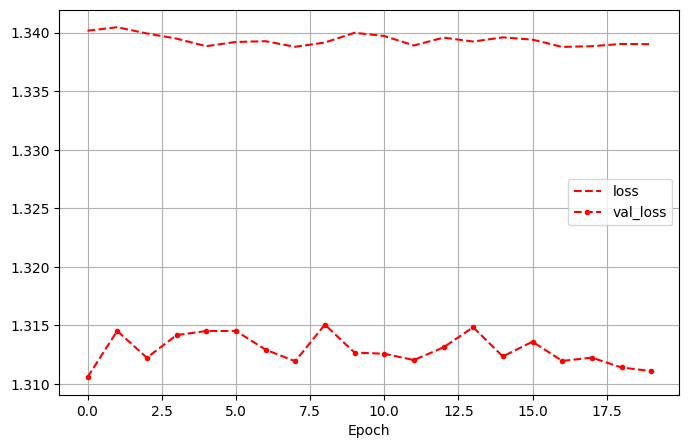

In [24]:
# Train the best model
best_model = tuner.get_best_models(num_models=1)[0]
history = best_model.fit(X_train_tmp, y_train_tmp, epochs=200, validation_data=(X_test, y_test))

# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters:\n{best_hps.values}")

# Plot the learning curves
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


**[Add your solution here]**

# 2. Binary classification DNN [17 marks]

Consider the [Portuguese Bank Marketing Data Set](https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set?select=bank_cleaned.csv) available at Kaggle. Download the `bank_cleaned.csv` file or from [Canvas](https://canvas.uw.edu/files/106328167/download?download_frd=1). Here we want to predict the success or failure of a bank marketing campaign using phone calls to promote a term deposit product. The target variable is `response_binary`.

The following code preprocesses the data. The day and month have been converted into cyclical features(1st day of the month has equal distance to the 2nd and the 31st).

In [31]:
df = pd.read_csv("bank_cleaned.csv")

month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
day_rad = (df["day"] - 1) * (2 * np.pi / 31)
month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)
df["day_sin"] = np.sin(day_rad)
df["day_cos"] = np.cos(day_rad)
df["month_sin"] = np.sin(month_rad)
df["month_cos"]  = np.cos(month_rad)
df.drop(columns=["Unnamed: 0", "month", "day", "response"], axis=1, inplace=True)
df.head()

C:\Users\ryanm\AppData\Local\Temp\ipykernel_9324\648047190.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,response_binary,day_sin,day_cos,month_sin,month_cos
0,58,management,married,tertiary,no,2143,yes,no,4.35,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
1,44,technician,single,secondary,no,29,yes,no,2.52,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
2,33,entrepreneur,married,secondary,no,2,yes,yes,1.27,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
3,35,management,married,tertiary,no,231,yes,no,2.32,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
4,28,management,single,tertiary,no,447,yes,yes,3.62,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5


In [32]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

train_set_tmp, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, valid_set = train_test_split(train_set_tmp, test_size=0.2, random_state=42)

X_train_raw = train_set.drop("response_binary", axis=1).copy()
y_train = train_set["response_binary"].copy()
X_valid_raw = valid_set.drop("response_binary", axis=1).copy()
y_valid = valid_set["response_binary"].copy()
X_test_raw = test_set.drop("response_binary", axis=1).copy()
y_test = test_set["response_binary"].copy()

num_attribs = list(X_train_raw._get_numeric_data().columns)
cat_attribs = list(set(X_train_raw.columns) - set(num_attribs))

cat_attribs_ord = ['default', 'housing', 'loan']
cat_attribs_hot = ['job', 'marital', 'education', 'poutcome']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat_hot", OneHotEncoder(), cat_attribs_hot),
        ("cat_ord", OrdinalEncoder(categories=[['no','yes'],['no','yes'],['no','yes']]), cat_attribs_ord)
    ])

X_train = full_pipeline.fit_transform(X_train_raw)
X_valid = full_pipeline.transform(X_valid_raw)
X_test = full_pipeline.transform(X_test_raw)

## (a) [4 marks]

In the next part you will build and fit a DNN with 4 hidden layers of 100 neurons each. Use the following specifications:

(i) He initialization and the Swish activation function.

(ii) The output layer has 1 neuron with sigmoid activation.

(iii) Compile with `loss="binary_crossentropy"` and  `metrics=["AUC"]`.

Explain why the choices (i), (ii), and (iii) are justified.

Also, state the proportion of sucesses in the training data.

**Solution**

**(i)** The Swish activation function is a great choice for complex tasks like predicting the success or failure from a market campaign. He Initialization is helpful when training models with mutiple layers as the outputs of each layer are typically not standardized, the exception is SELU, but this is helpful for Swish. 

**(ii)** The output layer with a single sigmoid activation is resonable for a binary classification problem. 

**(iii)** Again, binary crossentrophy is a reasonable function given that our target is a boolean value. AUC is a useful metric, however, this parameter is only used to gauage the performance of the model, for binary classification it is a good choice. 

In [41]:
# Define the model
model = keras.models.Sequential()

# Input layer
model.add(keras.layers.InputLayer(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))

# Output layer
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", metrics=["AUC"])

# Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Calculate the proportion of successes in the training
y_train_pred = model.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5)

# Report the proportion of successes in the training data
print(
    "Proportion of successes in the training data: ",
    np.mean(y_train_pred_binary == y_train.values.reshape(-1, 1))
)

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20


c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8628 - loss: 0.2523 - val_AUC: 0.8995 - val_loss: 0.2269
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9102 - loss: 0.2140 - val_AUC: 0.9054 - val_loss: 0.2181
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9124 - loss: 0.2110 - val_AUC: 0.9048 - val_loss: 0.2232
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9175 - loss: 0.2097 - val_AUC: 0.9157 - val_loss: 0.2103
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9272 - loss: 0.1943 - val_AUC: 0.9166 - val_loss: 0.2136
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9272 - loss: 0.1990 - val_AUC: 0.9132 - val_loss: 0.2081
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9291 - loss: 0.1956 - val_AUC: 0.9144 - val_loss: 0.2138
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9292 - loss: 0.1962 - val_AUC: 0.9085 - val_loss: 0.2202
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9375 -

## (b) [3 marks]

Train the model in (a) for 30 epochs and use exponential scheduling using the function below (`lr0=0.01`, `s=20`) and the NAG optimizer with `momentum=0.9`. Use a learning curve to comment on whether it is overfitting.

At the start of fitting your model, run `reset_session()` given by the following code.

**Solution** The Model is under fitting to the data by the charts

In [74]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

def exponential_decay(lr0, s):
    return lambda epoch: lr0 * 0.1**(epoch / s)

# Reset the session
reset_session()

# helpful function to build the optimizer
def build_nag_optimizer(lr=0.01, momentum=0.9, nesterov=True):
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=lr,
        decay_steps=20,
        decay_rate=0.1
    )
    return keras.optimizers.SGD(learning_rate=lr, momentum=momentum, nesterov=nesterov)

# Train the model
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# Plot the learning curves
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - AUC: 0.9689 - loss: 0.1317 - val_AUC: 0.8335 - val_loss: 0.3592
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9694 - loss: 0.1315 - val_AUC: 0.8359 - val_loss: 0.3663
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9718 - loss: 0.1257 - val_AUC: 0.8285 - val_loss: 0.3717
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9736 - loss: 0.1221 - val_AUC: 0.8383 - val_loss: 0.3648
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9761 - loss: 0.1145 - val_AUC: 0.8262 - val_loss: 0.3849
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9755 - loss: 0.1158 - val_AUC: 0.8303 - val_loss: 0.3993
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9738 - loss: 0.1192 - val_AUC: 0.8416 - val_loss: 0.3763
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9788 - loss: 0.1092 - val_AUC: 0.8300 - val_loss: 0.3948
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AU

## (c) [8 marks]

Fit separate models using the same specification as in (b) but with the following regularization techniques:

(i) batch normalization,

(ii) early stopping based on validation AUC with `patience=10` (look at the documentation and note the `mode` argument).

(iii) $\ell_2$ regularization with `l2=0.0002`,

(iv) dropout with probability 0.02,

(v) $\ell_2$ regularization and early stopping both as above,

(vi) batch normalization and dropout both as above.

At the start of each one of the above models, run `reset_session()`.

The performance measure is validation AUC. State this for the model in (b), and for each of the models here comment on whether it is better than the model in (b).

In [ ]:
# Create a dictionary to store the models
models = dict()

# Model from b is labeled as model 0
models['B'] = model

Epoch 1/20


c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8153 - loss: 0.2880 - val_AUC: 0.8713 - val_loss: 0.2463
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9019 - loss: 0.2234 - val_AUC: 0.8751 - val_loss: 0.2439
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9169 - loss: 0.2090 - val_AUC: 0.8746 - val_loss: 0.2484
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9289 - loss: 0.1959 - val_AUC: 0.8661 - val_loss: 0.2599
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9394 - loss: 0.1830 - val_AUC: 0.8560 - val_loss: 0.2782
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9493 - loss: 0.1696 - val_AUC: 0.8428 - val_loss: 0.3041
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9575 - loss: 0.1561 - val_AUC: 0.8326 - val_loss: 0.3347
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9643 - loss: 0.1435 - val_AUC: 0.8219 - val_loss: 0.3748
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9718 -

In [ ]:

# Build Model 1
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Complie model 1 and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
models[1] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:

# Build Model 2 with early stopping
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Set the early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=10, mode="max", monitor="val_auc"
)

# Complie model 2 and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[early_stopping])
models[2] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8339 - loss: 0.2781 - val_AUC: 0.8977 - val_loss: 0.2277
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9082 - loss: 0.2172 - val_AUC: 0.9042 - val_loss: 0.2217
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9153 - loss: 0.2107 - val_AUC: 0.9080 - val_loss: 0.2181
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9196 - loss: 0.2063 - val_AUC: 0.9099 - val_loss: 0.2157
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9229 - loss: 0.2029 - val_AUC: 0.9115 - val_loss: 0.2141
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9252 - loss: 0.2002 - val_AUC: 0.9125 - val_loss: 0.2129
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9274 - loss: 0.1978 - val_AUC: 0.9131 - val_loss: 0.2122
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9294 - loss: 0.1956 - val_AUC: 0.9136 - val_loss: 0.2118
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AU

In [ ]:
# Create a dictionary to store the models
models = dict()

# Build Model 3 with l2 regularization on the hidden layers
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(1, activation="sigmoid")
])

# Complie model 1 and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
models[3] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.4352 - val_AUC: 0.8963 - val_loss: 0.3771
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9075 - loss: 0.3669 - val_AUC: 0.9029 - val_loss: 0.3631
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9128 - loss: 0.3529 - val_AUC: 0.9067 - val_loss: 0.3518
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9164 - loss: 0.3416 - val_AUC: 0.9090 - val_loss: 0.3422
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9186 - loss: 0.3319 - val_AUC: 0.9102 - val_loss: 0.3338
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9202 - loss: 0.3232 - val_AUC: 0.9114 - val_loss: 0.3263
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9218 - loss: 0.3153 - val_AUC: 0.9122 - val_loss: 0.3195
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9230 - loss: 0.3082 - val_AUC: 0.9130 - val_loss: 0.3133
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AU

In [ ]:
# Create a dictionary to store the models
models = dict()

# Build Model 4 with Dropout of 0.02
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(1, activation="sigmoid")
])

# Complie model 4 and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
models[4] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20


c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8180 - loss: 0.2804 - val_AUC: 0.8936 - val_loss: 0.2302
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8981 - loss: 0.2257 - val_AUC: 0.8994 - val_loss: 0.2250
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9037 - loss: 0.2213 - val_AUC: 0.9033 - val_loss: 0.2213
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9083 - loss: 0.2162 - val_AUC: 0.9059 - val_loss: 0.2195
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9095 - loss: 0.2149 - val_AUC: 0.9101 - val_loss: 0.2160
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9123 - loss: 0.2128 - val_AUC: 0.9111 - val_loss: 0.2149
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9162 - loss: 0.2086 - val_AUC: 0.9125 - val_loss: 0.2127
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9186 - loss: 0.2066 - val_AUC: 0.9136 - val_loss: 0.2122
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9197 -

In [ ]:

# Build Model 5 with early stopping and l2 regularization on the hidden layers
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.0002)),
    keras.layers.Dense(1, activation="sigmoid")
])

# Set the early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    patience=10, mode="max", monitor="val_auc"
)

# Complie model 2 and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[early_stopping])
models[5] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.8115 - loss: 0.4461 - val_AUC: 0.8971 - val_loss: 0.3789
Epoch 2/20
 42/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9260 - loss: 0.3486

c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9061 - loss: 0.3686 - val_AUC: 0.9013 - val_loss: 0.3658
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9104 - loss: 0.3554 - val_AUC: 0.9041 - val_loss: 0.3550
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9132 - loss: 0.3444 - val_AUC: 0.9059 - val_loss: 0.3454
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9157 - loss: 0.3347 - val_AUC: 0.9074 - val_loss: 0.3367
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9176 - loss: 0.3260 - val_AUC: 0.9086 - val_loss: 0.3287
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9191 - loss: 0.3180 - val_AUC: 0.9098 - val_loss: 0.3214
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9206 - loss: 0.3106 - val_AUC: 0.9110 - val_loss: 0.3146
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9217 - loss: 0.3038 - val_AUC: 0.9122 - val_loss: 0.3084
Epoch 10/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9226 

In [ ]:
# Create a dictionary to store the models
models = dict()

# Build Model with Batch Normalization and Dropout
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.02),
    keras.layers.Dense(1, activation="sigmoid")
])

# Complie model and add it to the dictionary
model.compile(loss="binary_crossentropy", optimizer=build_nag_optimizer(), metrics=["AUC"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
models[6] = model

# Supress warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Epoch 1/20


c:\Users\ryanm\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


817/817 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - AUC: 0.7898 - loss: 0.3303 - val_AUC: 0.8802 - val_loss: 0.2407
Epoch 2/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8888 - loss: 0.2351 - val_AUC: 0.8815 - val_loss: 0.2395
Epoch 3/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9020 - loss: 0.2234 - val_AUC: 0.8836 - val_loss: 0.2359
Epoch 4/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9081 - loss: 0.2161 - val_AUC: 0.8832 - val_loss: 0.2396
Epoch 5/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9146 - loss: 0.2102 - val_AUC: 0.8794 - val_loss: 0.2422
Epoch 6/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9237 - loss: 0.2011 - val_AUC: 0.8760 - val_loss: 0.2498
Epoch 7/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9278 - loss: 0.1953 - val_AUC: 0.8731 - val_loss: 0.2521
Epoch 8/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.9345 - loss: 0.1876 - val_AUC: 0.8713 - val_loss: 0.2583
Epoch 9/20
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9382 -

In [ ]:
# Report the AUC metric for each model in models

for i, model in models.items():
    print(f"Model {i} AUC: ", model.evaluate(X_valid, y_valid, return_dict=True)["auc"])


## (d) [1 mark]

For the dropout model in (c)(iv) determine whether or not it is overfitting less than the model in (b).

**[Add your solution here]**

## (e) [1 mark]

Of the models in (b) and (c), one would now choose the best model according to the performance metric (validation AUC) to evaluate on the test set. But instead, evaluate the model in (c)(v) on the test set in terms of the AUC and confusion matrix (regardless of whether it is the best model given your results).

**[Add your solution here]**

# 3. Time series using machine learning [14 marks]

Obtain daily values of the [Japan/U.S. Foreign Exchange Rate (DEXJPUS)](https://fred.stlouisfed.org/series/DEXJPUS) starting from Jan 1, 1990, to Jan 1, 2023, from FRED. This can be obtained using the code below or you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/106328118/download?download_frd=1).

In [ ]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
data = pdr.get_data_fred('DEXJPUS', datetime(1990,1,1),datetime(2023,1,1))

## (a) [2 marks]

Create a training set (before 2010), a validation set (Jan 2010 to Dec 2015), and a test set (the rest of the data). Turn the time series data into a supervised learning dataset where the features are the value of the exchange rate in the last 10 days inclusive of the current day, and the target is the value of the exchange rate in the next day.

**[Add your solution here]**

## (b) [3 marks]

Fit a random forest regressor to predict the value of the exchange rate in the next day. Using the test set, report the mean squared error and the accuracy for the movement direction.

Hint: You can calculate the accuracy of the movement direction by determining what the actual movement direction is and comparing it to the movement direction corresponding to the predicted value of the exchange rate. For instance, the movement direction of the test set `X_test` and `y_test` where a strictly up movement is `True` can be computed as follows.

In [ ]:
movement_test = X_test[:,-1] < y_test.ravel()

**[Add your solution here]**

## (c) [4 marks]

Repeat (b), but now fit a deep RNN with 2 recurrent layers of 20 and 20 neurons, and an output layer which is 1 dense neuron. Use 100 epochs and the Nadam optimizer. Comment on the result and the learning curve (the validation set is used for the learning curve).

**[Add your solution here]**

## (d) [5 marks]

Create a supervised learning dataset suitable for predicting 3 days ahead instead of 1 day ahead. Adjust the deep RNN in (c) so that it predicts 3 days ahead. Use 100 epochs and the Nadam optimizer. Using the test set, report the mean squared error and the accuracy for the movement direction for each of the 3 days ahead predictions.  Comment on the result and the learning curve.

**[Add your solution here]**